## Exploratory data analysis

All your histograms are belong to us

In [1]:
import json
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
class DataGen(object):
    """
        Convenience class for iterating over important things
    """
    
    def __init__(self, path):
        self.path = path
        self.filter = ['text', 'tags', 'readingTime', 'keywords', 'likes', 'date', 'title']
    
    def _filter_fields(self, obj):
        res = {}
        for k in obj:
            if k in self.filter:
                res[k] = obj[k]
        return res
    
    def __iter__(self):
        for line in open(self.path):
            yield self._filter_fields(json.loads(line))

In [13]:
path = '/home/lextal/Sk/MLCourse/medium/data/medium.json'
gen = DataGen(path)

In [14]:
likes = []
tag_num = []
reading_time = []
n_words = []

for obj in gen:
    likes.append(obj['likes'])
    tag_num.append(len(obj['tags']))
    reading_time.append(obj['readingTime'])
    n_words.append(len(obj['text'].split()))

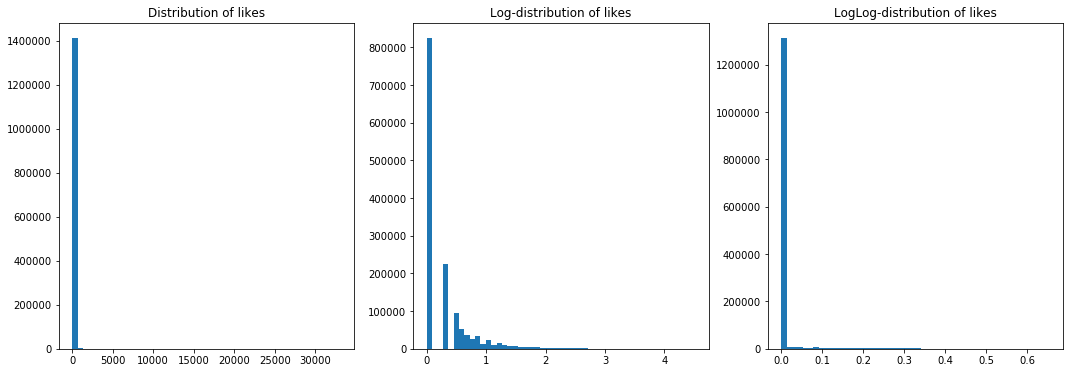

Number of documents with zero likes:  0 which is 0.00000 % of the whole


In [54]:
likes = np.array(likes)
zeros = np.where(likes == 0)[0]
bins = 50
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].hist(likes, bins=bins)
ax[0].set_title('Distribution of likes')
ax[1].hist(np.log10(likes[likes > 0]), bins=bins) 
ax[1].set_title('Log-distribution of likes')
ax[2].hist(softlog(softlog(likes)), bins=bins)
ax[2].set_title('LogLog-distribution of likes')
plt.show()
print('Number of documents with zero likes: ', zeros.shape[0], 
      'which is {0:0.5f} % of the whole'.format(zeros.shape[0] / likes.shape[0]))

These distributions kinda suck as target variables, so we could split this task into a more sensible one.

Let's start with th hypothesis that all posts are divided by popularity into three groups: popular, mediocre and meh. These groups are roughly defined by some ranges of likes that they've got. At this moment we don't consider the problem when the time of publication comes into play, because some of the posts could be around for longer time. 

The next task is to check whether such groups can be extracted.

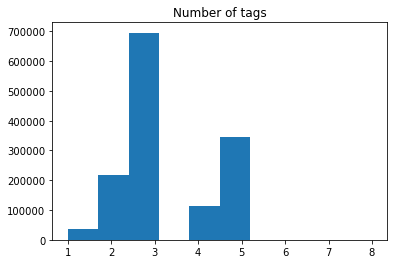

In [53]:
# TODO: make a barplot of this
tag_num = np.array(tag_num)
zeros = np.where(tag_num == 0)[0]
plt.hist(tag_num[tag_num > 0], bins=10)
plt.title('Number of tags')
plt.show()

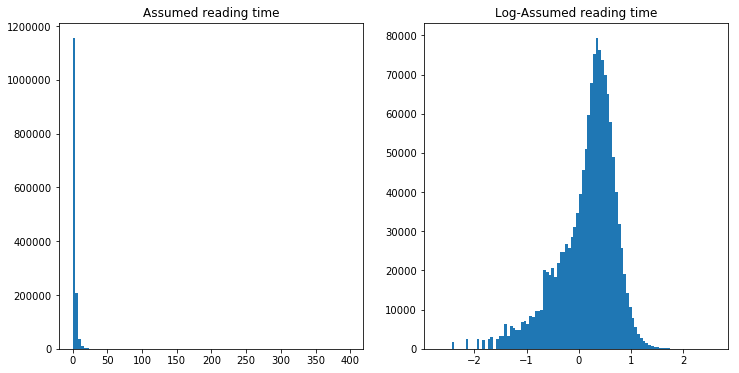

Number of documents with unknown reading time:  693 which is 0.00049 % of the whole


In [45]:
reading_time = np.array(reading_time)
bins = 100
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(reading_time[reading_time > 0], bins=bins)
ax[0].set_title('Assumed reading time')
ax[1].hist(np.log10(reading_time[reading_time > 0]), bins=bins)
ax[1].set_title('Log-Assumed reading time')
plt.show()
zeros = np.where(reading_time <= 0)[0]
print('Number of documents with unknown reading time: ', zeros.shape[0], 
      'which is {0:0.5f} % of the whole'.format(zeros.shape[0] / reading_time.shape[0]))

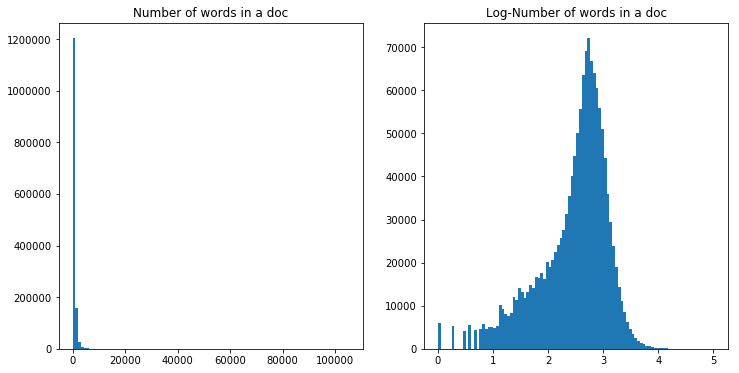

Number of documents with zero words:  10583 which is 0.00748 % of the whole


In [49]:
n_words = np.array(n_words)
bins = 100
zeros = np.where(n_words == 0)[0]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(n_words[n_words > 0], bins=bins)
ax[0].set_title('Number of words in a doc')
ax[1].hist(np.log10(n_words[n_words > 0]), bins=bins)
ax[1].set_title('Log-Number of words in a doc')
plt.show()
print('Number of documents with zero words: ', zeros.shape[0], 
      'which is {0:0.5f} % of the whole'.format(zeros.shape[0] / n_words.shape[0]))

This preliminary EDA shows that there's some data cleaning to do, e.g. remove very short documents or documents with zero tags (6734).